# Explore here

In [3]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df_depurado=df[['MedInc','Latitude','Longitude']]
df_depurado.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_depurado, test_size=0.2, random_state=42)


In [13]:
from sklearn.cluster import KMeans

model_k = KMeans(n_clusters=6, n_init='auto',random_state=42)
model_k.fit(X_train)

/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sa

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [15]:
model_k.labels_

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [19]:
y_train = list(model_k.labels_)
X_train['clusters'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster,clusters
14196,3.2596,32.71,-117.03,3,3
8267,3.8125,33.77,-118.16,1,1
17445,4.1563,34.66,-120.48,1,1
14265,1.9425,32.69,-117.11,3,3
2271,3.5542,36.78,-119.80,5,5


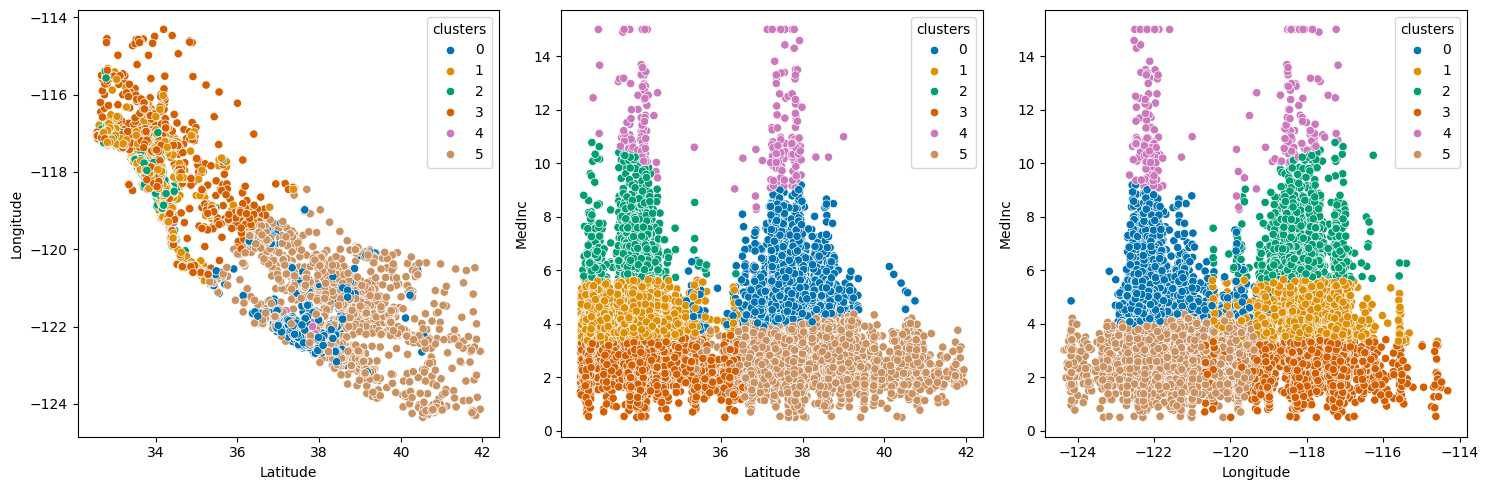

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue='clusters', palette='colorblind')
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue='clusters', palette='colorblind')
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue='clusters', palette='colorblind')

plt.tight_layout()
plt.show()

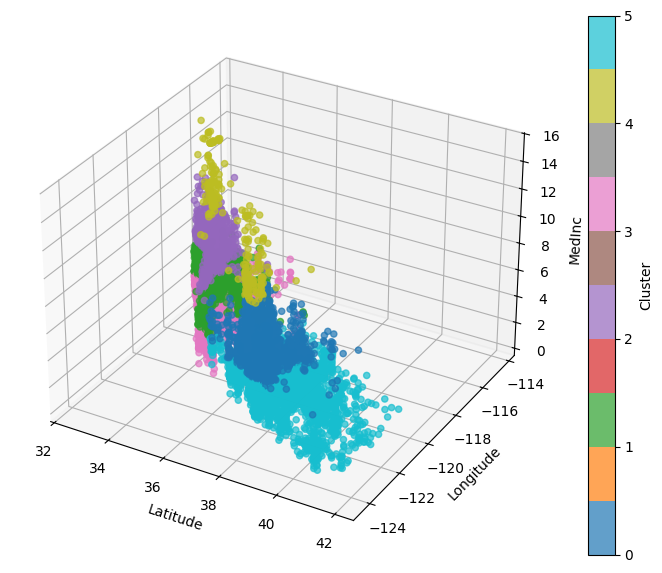

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig_3d = plt.figure(figsize=(10, 7))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter = ax_3d.scatter(
    X_train['Latitude'], 
    X_train['Longitude'], 
    X_train['MedInc'], 
    c=X_train['clusters'], 
    cmap='tab10', 
    alpha=0.7
)
ax_3d.set_xlabel('Latitude')
ax_3d.set_ylabel('Longitude')
ax_3d.set_zlabel('MedInc')
fig_3d.colorbar(scatter, ax=ax_3d, label='Cluster')
plt.show()

In [28]:
y_test = list(model_k.predict(X_test))
X_test['clusters'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,clusters
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


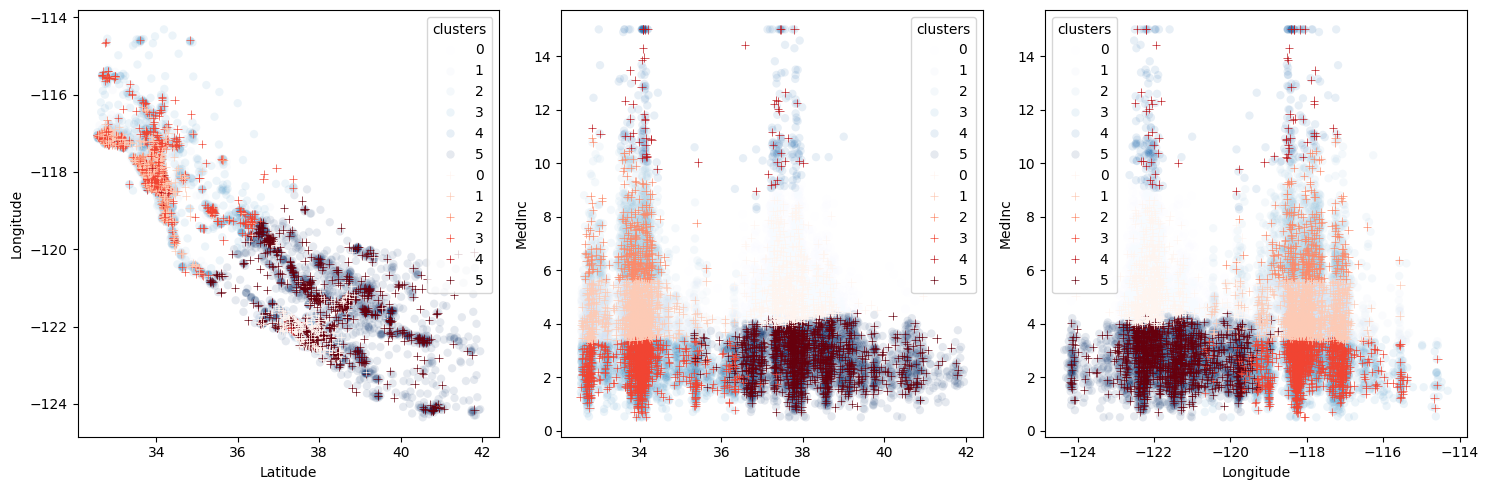

In [34]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue='clusters', palette='Blues', alpha=0.1)
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue='clusters', palette='Blues', alpha=0.1)
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue='clusters', palette='Blues', alpha=0.1)

sns.scatterplot(ax=axis[0], data=X_test, x='Latitude', y='Longitude', hue='clusters', palette='Reds', marker='+')
sns.scatterplot(ax=axis[1], data=X_test, x='Latitude', y='MedInc', hue='clusters', palette='Reds', marker='+')
sns.scatterplot(ax=axis[2], data=X_test, x='Longitude', y='MedInc', hue='clusters', palette='Reds', marker='+')



plt.tight_layout()
plt.show()

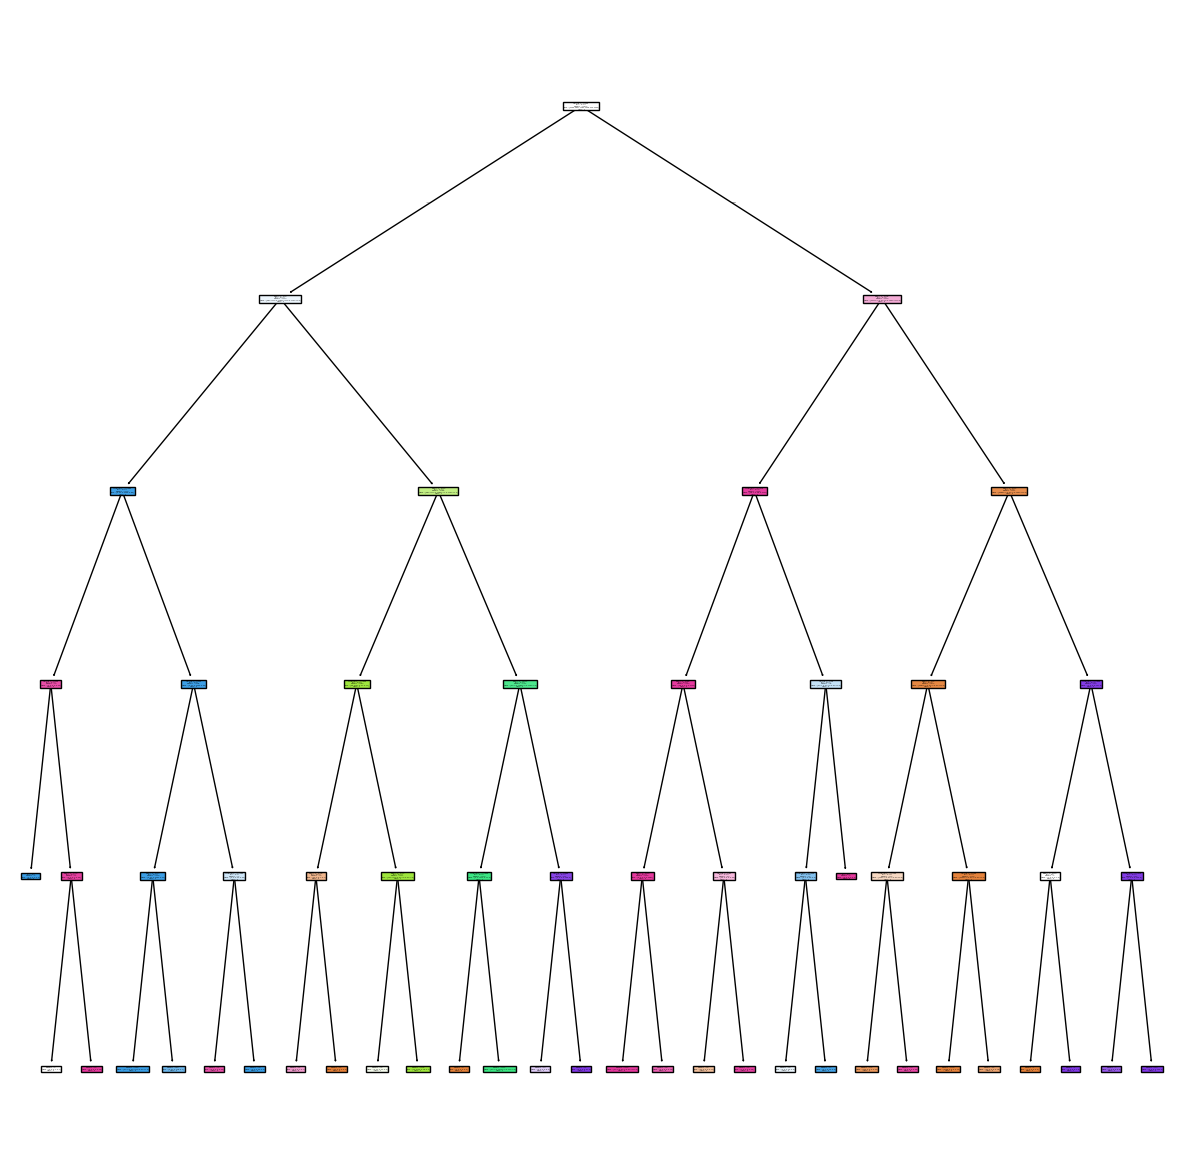

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['clusters'])
from sklearn import tree
plt.figure(figsize=(15, 15))
tree.plot_tree(tree_model, filled=True, feature_names=['Latitude', 'Longitude', 'MedInc'], class_names=[str(i) for i in range(6)])
plt.show()

In [32]:
y_pred = tree_model.predict(X_test[['Latitude', 'Longitude', 'MedInc']])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the decision tree model: {accuracy:.2f}')

Accuracy of the decision tree model: 0.98


In [33]:
from pickle import dump
dump(model_k, open('../models/kmeans_model.pkl', 'wb'))
dump(tree_model, open('../models/decision_tree_model.pkl', 'wb'))
